Diagramme de la structure de bande:


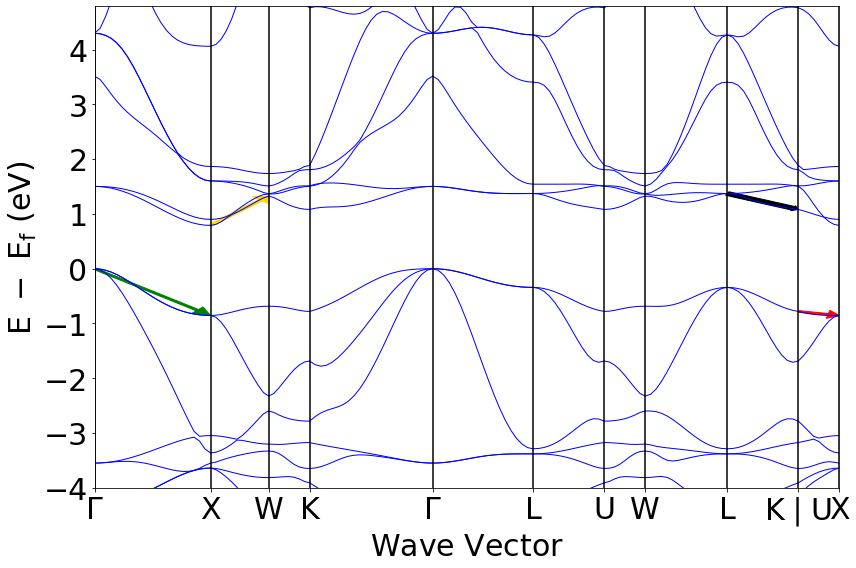

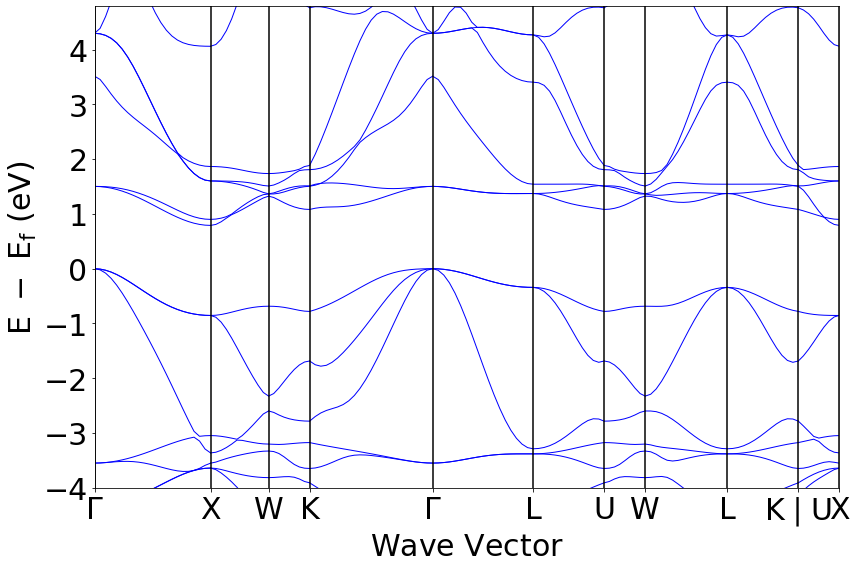

In [51]:
from pymatgen import Structure
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure as bs
from IPython.display import Image
import numpy as np
with MPRester("izD7mJmnjhUOKyWGtZ") as m:

    bands = structure = m.get_bandstructure_by_material_id("mp-30847")

    bplot = plotter.BSPlotter(bands)
    print("Diagramme de la structure de bande:")
    bplot.show()
    


# Bande interdite :
La fonction ci-dessous nous informe sur la bande interdite de TiSnPt. Il est un semi-conducteur dont la bande interdite à une énergie de 0.7908 eV.

Cette bande interdite est indirecte. Cela signique que la différence entre les extremums de la bande de valence et la bande de conduction est non nulle. Le vecteur d'onde va dès lors évoluer dans la bande interdite suivant une direction Gamma-X
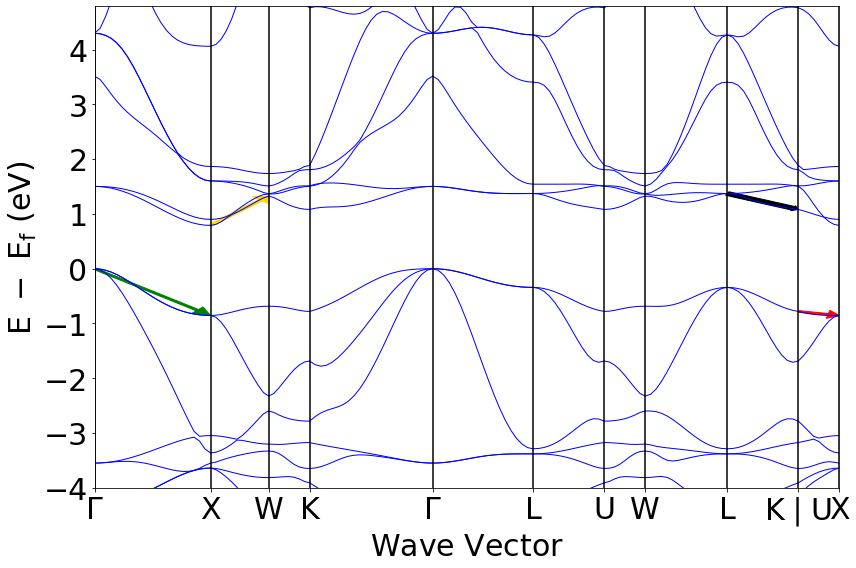

In [5]:
# bande interdite    
    bandgap = bands.get_band_gap()
    print(bandgap)

{'direct': False, 'energy': 0.7908, 'transition': '\\Gamma-X'}


# Dispersion maximale et minimale :
## Dans la dernière bande de valence
La pente maximale de la dernière bande de valence vaut -0.8472 et se situe entre Γ et K. Dès lors, la dernière bande de valence présente une dispersion maximale selon la direction Γ-K comme indiqué par la flèche verte.

La pente minimale de la dernière bande de valence vaut -0.2070 et se situe entre K|X et U. Dès lors, la dernière bande de valence présente une dispersion minimale selon la direction K|X-U comme indiqué par la flèche rouge.

## Dans la première bande de conduction 
La pente minimale de la première bande de conduction est  0.06747 et se situe entre L et K|U. La première bande de conduction présente une dispersion mainimale selon la direction L-K|U comme indiqué par la flèche noire.

La pente maximale de la première bande de conduction vaut 1.0595 et se situe entre X et W. La première bande de conduction présente une dispersion maximale selon la direction X-W comme indiqué par la flèche jaune.


Ci-dessous est représenté le diagramme de structure de bande avec les directions des dispersions maximales et minimales pour la dernière bande de valence et la première bande de conduction.


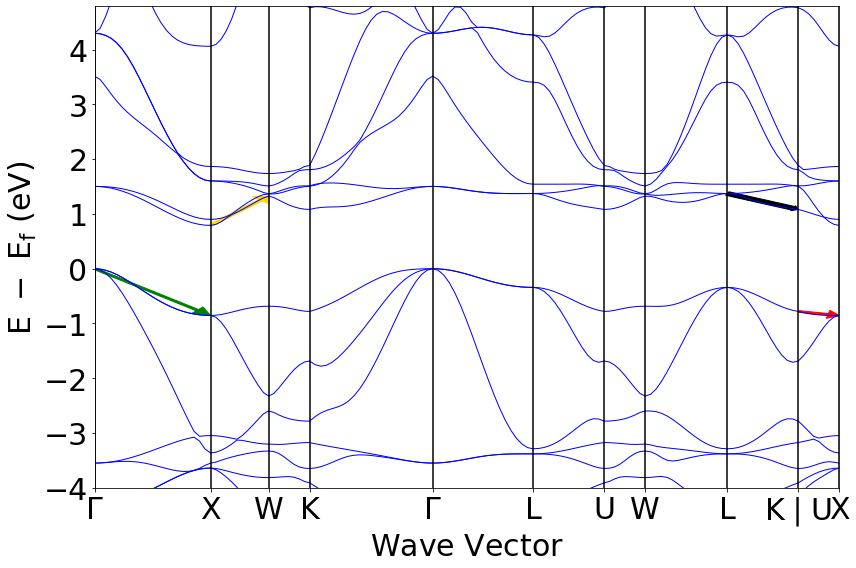



In [50]:
# dernière bande de valence    
    vbm = bands.get_vbm()
    print("L'index de la première bande de valence est :",vbm['band_index'])
#énergies
    data=bplot.bs_plot_data()
    label=data.get('ticks').get('label') 
    print(label)
    IndTh=np.array([0,1,3,5,7,9,11,13,15,17,18]) #nouveau vecteur pour éviter les redondances

    E0v = np.zeros((10)) 
    E1v = np.zeros((10))
    diffv = np.zeros((10))
    for i in range(0,10):
        E0v[i] = (data.get("energy")[i].get("1")[16])[0] #on stocke la première énergie de la branche
        E1v[i] = (data.get("energy")[i].get("1")[16])[-1]#on stocke la dernière énergie de la branche
        diffv[i]=E1v[i]-E0v[i] #calcul des différence d'energie pour chaque direction
        i = i+1
    print("ΔEnergies :" ,diffv)
#calcul des distances 
    position=np.zeros(len(IndTh))
    dist=np.zeros(len(IndTh)-1)
    for i in range(0,len(IndTh)) : 
        if i==0 :
            position[i]=data.get('ticks').get('distance')[0]
        else: 
            position[i]=data.get('ticks').get('distance')[IndTh[i]]
            dist[i-1]=position[i]-position[i-1]
    print("Les distances :" , dist) 
#pentes pour chaque direction
    pentesv=np.zeros(len(IndTh)-1)
    pentesv=diffv/dist
    print("Les pentes :" ,pentesv)
    print("La pente max en valeur absolue :" ,np.max(abs(pentesv)))
    print("La pente min en valeur absolue :" ,np.min(abs(pentesv)))
    
# première bande de conduction   
    cbm = bands.get_cbm()
    print("L'index de la dernière bande de conduction est :",cbm['band_index'])
#énergies
    data=bplot.bs_plot_data()
    label=data.get('ticks').get('label') 
    print(label)
    IndTh=np.array([0,1,3,5,7,9,11,13,15,17,18]) #nouveau vecteur pour éviter les redondances

    E0c = np.zeros((10)) 
    E1c = np.zeros((10))
    diffc = np.zeros((10))
    for i in range(0,10):
        E0c[i] = (data.get("energy")[i].get("1")[17])[0] #on stocke la première énergie de la branche
        E1c[i] = (data.get("energy")[i].get("1")[17])[-1]#on stocke la dernière énergie de la branche
        diffc[i]=E1c[i]-E0c[i] #calcul des différence d'energie pour chaque direction
        i = i+1
    print("ΔEnergies :" ,diffc)
#calcul des distances 
    position=np.zeros(len(IndTh))
    dist=np.zeros(len(IndTh)-1)
    for i in range(0,len(IndTh)) : 
        if i==0 :
            position[i]=data.get('ticks').get('distance')[0]
        else: 
            position[i]=data.get('ticks').get('distance')[IndTh[i]]
            dist[i-1]=position[i]-position[i-1]
    print("Les distances :" , dist) 
#pentes pour chaque direction
    pentesc=np.zeros(len(IndTh)-1)
    pentesc=diffc/dist
    print("Les pentes :" ,pentesc)
    print("La pente max en valeur absolue :" ,np.max(abs(pentesc)))
    print("La pente min en valeur absolue :" ,np.min(abs(pentesc)))
    ticksv = data.get("ticks")
    ticksc = data.get("ticks")
    bplot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
    plt.arrow(ticksc.get("distance")[1], E0c[1], dist[1], diffc[1], color='gold', width = 0.04, head_width = 0.2, head_length = 0.1, length_includes_head= True)
    plt.arrow(ticksc.get("distance")[16], E0c[8], dist[8], diffc[8], color='black', width = 0.07, head_width = 0.1, head_length = 0.05, length_includes_head= True)
    plt.arrow(ticksv.get("distance")[0], E0v[0], dist[0], diffv[0], color='green', width = 0.03, head_width = 0.15, head_length = 0.15, length_includes_head= True)
    plt.arrow(ticksv.get("distance")[17], E0v[9], dist[9], diffv[9], color='red', width = 0.03, head_width = 0.15, head_length = 0.1, length_includes_head= True)
    

L'index de la première bande de valence est : defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15, 16]})
['$\\Gamma$', 'X', 'X', 'W', 'W', 'K', 'K', '$\\Gamma$', '$\\Gamma$', 'L', 'L', 'U', 'U', 'W', 'W', 'L', 'L', 'K$\\mid$U', 'X']
ΔEnergies : [-0.8542  0.1689 -0.0951  0.7804 -0.3414 -0.439   0.0951  0.3439 -0.439
 -0.0738]
Les distances : [1.0082421  0.50412105 0.35646741 1.06940224 0.87316327 0.61741967
 0.35646741 0.71293483 0.61741967 0.35646741]
Les pentes : [-0.84721715  0.33503858 -0.26678455  0.72975347 -0.39099217 -0.71102367
  0.26678455  0.48237228 -0.71102367 -0.20703155]
La pente max en valeur absolue : 0.8472171505617271
La pente min en valeur absolue : 0.2070315468589123
L'index de la dernière bande de conduction est : defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})
['$\\Gamma$', 'X', 'X', 'W', 'W', 'K', 'K', '$\\Gamma$', '$\\Gamma$', 'L', 'L', 'U', 'U', 'W', 'W', 'L', 'L', 'K$\\mid$U', 'X']
ΔEnergies : [-0.7124  0.5341 -0.2426  0.4209 -0.1302 -0.2907  0.2426  0.0481 -

# Masse effective
La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut : 2.8537169310128174e-32 [kg]

La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut : 0.0 [kg]

En comparaison, la masse de l électron vaut 9.109e-31 [kg]



In [52]:

# masse effective        
    h = 6.58212e-16 

    # Calcul de la masse effective pour le minimum de bande de conduction
    ec = cbm['energy']
    kc = cbm['kpoint'].cart_coords
    mc = (h**2)/(2*ec)*(kc[0]**2+kc[1]**2+kc[2]**2)
    print("La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut :", mc, '[kg]')

    # Calcul de la masse effective pour le maximum de bande de valence
    ev = vbm['energy']
    kv = vbm['kpoint'].cart_coords
    mv = (h**2)/(2*ev)*(kv[0]**2+kv[1]**2+kv[2]**2)
    print("La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut :", mv, '[kg]')

    print("En comparaison, la masse de l électron vaut 9.109e-31 [kg]")


La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut : 2.8537169310128174e-32 [kg]
La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut : 0.0 [kg]
En comparaison, la masse de l électron vaut 9.109e-31 [kg]
